In [1]:
library(vegan)

Loading required package: permute
Loading required package: lattice
This is vegan 2.4-5


## Data Preparation for RDA analysis

In [2]:
mf_16S = read.csv('data/partial_rda/16S/combined_metadata_effectsize.txt', sep='\t')
mf_metabolomics = read.csv('data/partial_rda/metabolomics/combined_metadata_effectsize.txt', sep='\t')

In [3]:
pc_16S = read.csv('data/partial_rda/16S/unweighted_pcoa_no_base.tsv', header=FALSE, sep='\t', skip=9)
pc_metabolomics = read.csv('data/partial_rda/metabolomics/braycurtis_pcoa_nobase.tsv', header=FALSE, sep='\t', skip=9)

In [4]:
pc_16S = pc_16S[, 1:11]
colnames(pc_16S) = c('X.SampleID', 'PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10')

pc_metabolomics = pc_metabolomics[, 1:11]
colnames(pc_metabolomics) = c('X.SampleID', 'PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10')

In [5]:
data_16S = merge(mf_16S, pc_16S, by="X.SampleID")
data_metabolomics = merge(mf_metabolomics, pc_metabolomics, by="X.SampleID")

In [6]:
X_16S = data_16S[, c('age', 'cage_number', 'exposure_type', 'genotype', 'mouse_number', 'weight')]
Y_16S = data_16S[, c('PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10')]

X_metabolomics = data_metabolomics[, c('age', 'cage_number', 'exposure_type', 'genotype', 'mouse_number', 'weight')]
Y_metabolomics = data_metabolomics[, c('PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10')]

In [7]:
summary(X_16S)

      age         cage_number  exposure_type          genotype  
 Min.   :11.00   A21    : 72   Air:296       ApoE KO      :412  
 1st Qu.:12.50   A18    : 71   IHH:286       LDLR knockout:170  
 Median :14.50   A23    : 71                                    
 Mean   :14.72   A20    : 69                                    
 3rd Qu.:16.50   A22    : 68                                    
 Max.   :19.50   A19    : 61                                    
                 (Other):170                                    
  mouse_number        weight     
 Min.   : 17.00   Min.   :20.50  
 1st Qu.: 30.00   1st Qu.:25.80  
 Median :104.00   Median :27.10  
 Mean   : 84.03   Mean   :27.99  
 3rd Qu.:112.00   3rd Qu.:29.68  
 Max.   :120.00   Max.   :40.00  
                                 

In [8]:
summary(X_metabolomics)

      age         cage_number exposure_type          genotype  
 Min.   :11.00   5      :44   Air:133       ApoE KO      : 93  
 1st Qu.:12.00   7      :43   IHH:130       LDLR knockout:170  
 Median :14.00   8      :42                                    
 Mean   :14.26   6      :41                                    
 3rd Qu.:15.50   A18    :16                                    
 Max.   :19.50   A20    :16                                    
                 (Other):61                                    
  mouse_number        weight     
 Min.   : 17.00   Min.   :21.40  
 1st Qu.: 22.50   1st Qu.:25.70  
 Median : 29.00   Median :26.80  
 Mean   : 54.22   Mean   :27.42  
 3rd Qu.:104.00   3rd Qu.:28.40  
 Max.   :120.00   Max.   :40.00  
                                 

# dbRDA

In [9]:
(dbrda_16S <- rda(Y_16S ~ exposure_type + Condition(age + cage_number + genotype + mouse_number + weight) , 
                 X_16S))

Call: rda(formula = Y_16S ~ exposure_type + Condition(age + cage_number
+ genotype + mouse_number + weight), data = X_16S)

              Inertia Proportion Rank
Total         0.06856    1.00000     
Conditional   0.04811    0.70169   12
Constrained   0.00000    0.00000    0
Unconstrained 0.02045    0.29831   10
Inertia is variance 
Some constraints were aliased because they were collinear (redundant)

Eigenvalues for unconstrained axes:
     PC1      PC2      PC3      PC4      PC5      PC6      PC7      PC8 
0.005780 0.003358 0.002353 0.002036 0.001831 0.001465 0.001339 0.001053 
     PC9     PC10 
0.000861 0.000376 


In [10]:
(dbrda_metab <- rda(Y_metabolomics ~ exposure_type + Condition(age + cage_number + genotype + mouse_number + weight) , 
                 X_metabolomics))

Call: rda(formula = Y_metabolomics ~ exposure_type + Condition(age +
cage_number + genotype + mouse_number + weight), data = X_metabolomics)

              Inertia Proportion Rank
Total         0.11333    1.00000     
Conditional   0.08897    0.78504   12
Constrained   0.00000    0.00000    0
Unconstrained 0.02436    0.21496   10
Inertia is variance 
Some constraints were aliased because they were collinear (redundant)

Eigenvalues for unconstrained axes:
     PC1      PC2      PC3      PC4      PC5      PC6      PC7      PC8 
0.006303 0.005472 0.002782 0.002241 0.002158 0.001704 0.001533 0.001182 
     PC9     PC10 
0.000698 0.000287 


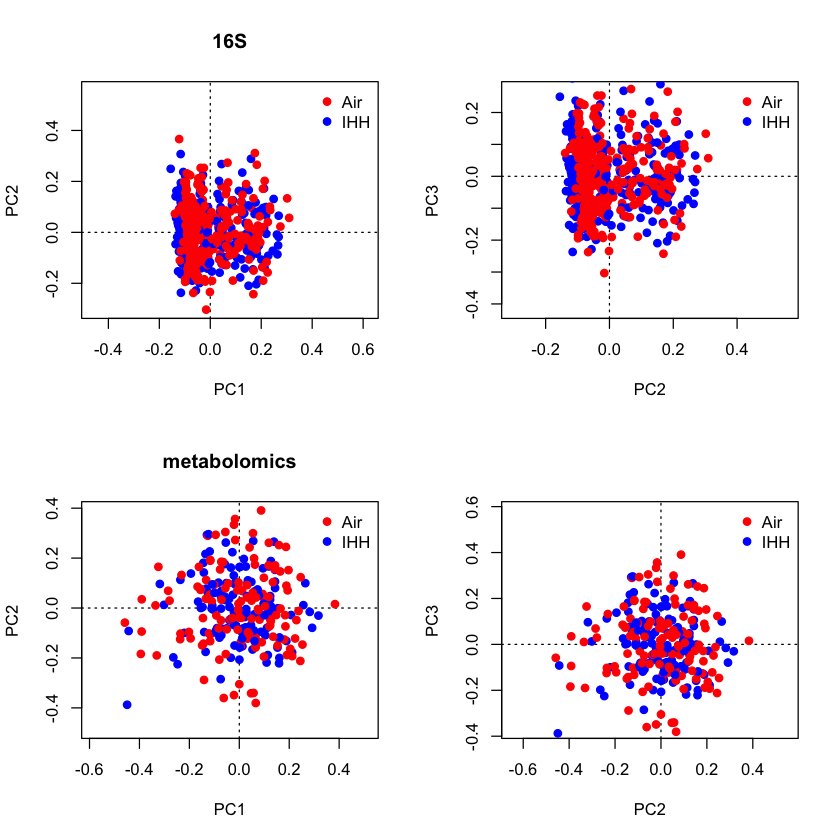

In [11]:
par(mfrow=c(2,2))
colvec=c('red', 'blue')
plot(dbrda_16S, type='n', main='16S')
with(X_16S, points(dbrda_16S, col = colvec[exposure_type],
                      pch = 21, bg = colvec[exposure_type]))
with(X_16S, legend("topright", legend = levels(exposure_type), bty = "n",
                      col = colvec, pch = 21, pt.bg = colvec))

plot(dbrda_16S, type='n', choices=c(2,3))
with(X_16S, points(dbrda_16S, col = colvec[exposure_type],
                      pch = 21, bg = colvec[exposure_type]))
with(X_16S, legend("topright", legend = levels(exposure_type), bty = "n",
                      col = colvec, pch = 21, pt.bg = colvec))

plot(dbrda_metab, type='n', main='metabolomics')
with(X_metabolomics, points(dbrda_metab, col = colvec[exposure_type],
                      pch = 21, bg = colvec[exposure_type]))
with(X_metabolomics, legend("topright", legend = levels(exposure_type), bty = "n",
                      col = colvec, pch = 21, pt.bg = colvec))

plot(dbrda_metab, type='n', choices=c(2,3))
with(X_metabolomics, points(dbrda_metab, col = colvec[exposure_type],
                      pch = 21, bg = colvec[exposure_type]))
with(X_metabolomics, legend("topright", legend = levels(exposure_type), bty = "n",
                      col = colvec, pch = 21, pt.bg = colvec))

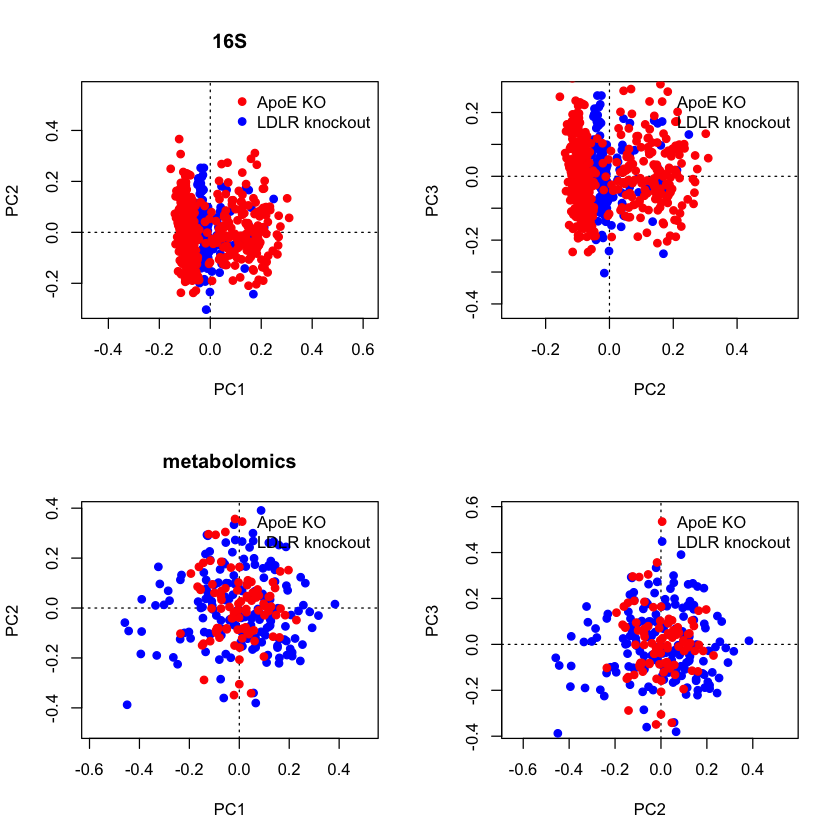

In [12]:
par(mfrow=c(2,2))
colvec=c('red', 'blue')
plot(dbrda_16S, type='n', main='16S')
with(X_16S, points(dbrda_16S, col = colvec[genotype],
                      pch = 21, bg = colvec[genotype]))
with(X_16S, legend("topright", legend = levels(genotype), bty = "n",
                      col = colvec, pch = 21, pt.bg = colvec))

plot(dbrda_16S, type='n', choices=c(2,3))
with(X_16S, points(dbrda_16S, col = colvec[genotype],
                      pch = 21, bg = colvec[genotype]))
with(X_16S, legend("topright", legend = levels(genotype), bty = "n",
                      col = colvec, pch = 21, pt.bg = colvec))

plot(dbrda_metab, type='n', main='metabolomics')
with(X_metabolomics, points(dbrda_metab, col = colvec[genotype],
                      pch = 21, bg = colvec[genotype]))
with(X_metabolomics, legend("topright", legend = levels(genotype), bty = "n",
                      col = colvec, pch = 21, pt.bg = colvec))

plot(dbrda_metab, type='n', choices=c(2,3))
with(X_metabolomics, points(dbrda_metab, col = colvec[genotype],
                      pch = 21, bg = colvec[genotype]))
with(X_metabolomics, legend("topright", legend = levels(genotype), bty = "n",
                      col = colvec, pch = 21, pt.bg = colvec))